In [0]:
# Install TensorFlow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
# Load in the data
from sklearn.datasets import load_breast_cancer

# Exploratory Data Analysis

In [0]:
# Load the data
data = load_breast_cancer()

In [0]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
data.data.shape # 569 samples

(569, 30)

In [0]:
len(data.feature_names) # 30 features

30

In [0]:
data.feature_names # the 30 feature names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
type(data.data) # multidimensional array

numpy.ndarray

In [0]:
data.target # 0's and 1's, so it is binary classification - use sigmoid for activation

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [0]:
data.target_names # 2 classes, so binary classification

array(['malignant', 'benign'], dtype='<U9')

In [0]:
data.target.shape # 569 targets, one for each sample

(569,)

# Data Preprocessing

## Train Test Split

In [0]:
# import necessary libraries
from sklearn.model_selection import train_test_split


In [0]:
X = data.data
y = data.target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
N, D = X_train.shape

## Normalizing Data

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler() # Instantiate scaler

In [0]:
# Scale training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building Model

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [0]:
i = Input(shape=(D,))
x = Dense(1, activation='sigmoid')(i)

model = Model(i, x)

In [0]:
# compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Training Model

In [0]:
r = model.fit(
    X_train, y_train,
    epochs = 100,
    validation_data=(X_test, y_test),
)

Epoch 1/100
12/12 [==============================] - 0s 12ms/step - loss: 1.3579 - accuracy: 0.1286 - val_loss: 1.2380 - val_accuracy: 0.1170
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.2401 - accuracy: 0.1522 - val_loss: 1.1295 - val_accuracy: 0.1489
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1227 - accuracy: 0.1864 - val_loss: 1.0322 - val_accuracy: 0.1968
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0239 - accuracy: 0.2572 - val_loss: 0.9402 - val_accuracy: 0.2606
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9297 - accuracy: 0.3228 - val_loss: 0.8595 - val_accuracy: 0.3617
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8454 - accuracy: 0.4436 - val_loss: 0.7886 - val_accuracy: 0.4681
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7736 - accuracy: 0.5013 - val_loss: 0.7256 - val_accuracy: 0.5479
Epoch 8/100


# Evaluating Model Performance

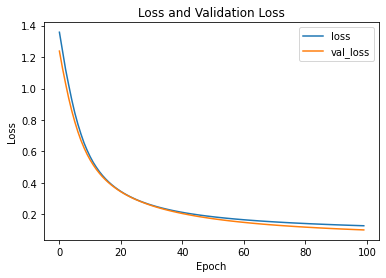

In [0]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Validation Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

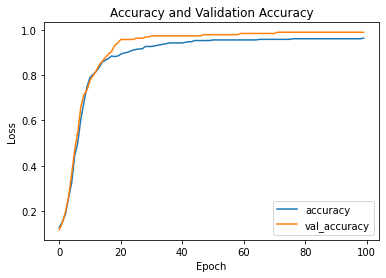

In [0]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy and Validation Accuracy")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()